<a href="https://colab.research.google.com/github/KhanhPham2411/DL_Tutorial/blob/master/L2/l2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare github files

In [1]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=32eb1b35fa2e4c4f0ada4708db569379ed4ea5e294c23f3c98a6b2053bd6db4d
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [2]:
import wget
wget.download('https://github.com/KhanhPham2411/DL_Tutorial/archive/master.zip')

'DL_Tutorial-master.zip'

In [0]:
!unzip DL_Tutorial-master.zip

In [53]:
cd DL_Tutorial-master/L2/

/content/DL_Tutorial-master/L2


# Use Python

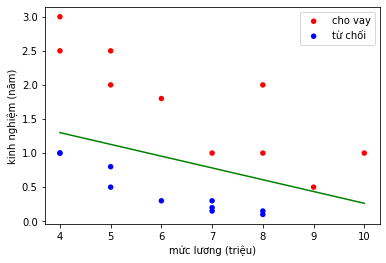

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Hàm sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Load data từ file csv
data = pd.read_csv('dataset.csv').values
N, d = data.shape
x = data[:, 0:d-1].reshape(-1, d-1)
y = data[:, 2].reshape(-1, 1)

# Vẽ data bằng scatter
x_cho_vay = x[y[:,0]==1]
x_tu_choi = x[y[:,0]==0]

plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')

# Thêm cột 1 vào dữ liệu x
x = np.hstack((np.ones((N, 1)), x))

w = np.array([0.,0.1,0.1]).reshape(-1,1)

# Số lần lặp bước 2
numOfIteration = 1000
cost = np.zeros((numOfIteration,1))
learning_rate = 0.01

for i in range(1, numOfIteration):
    
	 # Tính giá trị dự đoán
    y_predict = sigmoid(np.dot(x, w))
    cost[i] = -np.sum(np.multiply(y, np.log(y_predict)) + np.multiply(1-y, np.log(1-y_predict)))
    # Gradient descent
    w = w - learning_rate * np.dot(x.T, y_predict-y)	 
    # print(cost[i])

# Vẽ đường phân cách.
t = 0.5
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()

# Use Tensorflow

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data từ file csv
data = pd.read_csv('dataset.csv').values
N, d = data.shape
x = data[:, 0:d-1].reshape(-1, d-1)
y = data[:, 2].reshape(-1, 1)

In [57]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_shape = (1, 2), activation="sigmoid"))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1, 1)              3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.1), loss="mean_squared_error", metrics=["acc"])

In [61]:
model.fit(x, y, epochs=20)

Epoch 1/20
1/1 [==============================] - 0s 2ms/step - loss: 0.1438 - acc: 0.8500
Epoch 2/20
1/1 [==============================] - 0s 2ms/step - loss: 0.2372 - acc: 0.7000
Epoch 3/20
1/1 [==============================] - 0s 1ms/step - loss: 0.1263 - acc: 0.8000
Epoch 4/20
1/1 [==============================] - 0s 1ms/step - loss: 0.1244 - acc: 0.8500
Epoch 5/20
1/1 [==============================] - 0s 2ms/step - loss: 0.1232 - acc: 0.8000
Epoch 6/20
1/1 [==============================] - 0s 1ms/step - loss: 0.1255 - acc: 0.7000
Epoch 7/20
1/1 [==============================] - 0s 2ms/step - loss: 0.1331 - acc: 0.8500
Epoch 8/20
1/1 [==============================] - 0s 5ms/step - loss: 0.1474 - acc: 0.8000
Epoch 9/20
1/1 [==============================] - 0s 2ms/step - loss: 0.1251 - acc: 0.8500
Epoch 10/20
1/1 [==============================] - 0s 4ms/step - loss: 0.1264 - acc: 0.8000
Epoch 11/20
1/1 [==============================] - 0s 3ms/step - loss: 0.1192 - acc: 0.80

In [68]:
x

array([[10.  ,  1.  ],
       [ 5.  ,  2.  ],
       [ 6.  ,  1.8 ],
       [ 7.  ,  1.  ],
       [ 8.  ,  2.  ],
       [ 9.  ,  0.5 ],
       [ 4.  ,  3.  ],
       [ 5.  ,  2.5 ],
       [ 8.  ,  1.  ],
       [ 4.  ,  2.5 ],
       [ 8.  ,  0.1 ],
       [ 7.  ,  0.15],
       [ 4.  ,  1.  ],
       [ 5.  ,  0.8 ],
       [ 7.  ,  0.3 ],
       [ 4.  ,  1.  ],
       [ 5.  ,  0.5 ],
       [ 6.  ,  0.3 ],
       [ 7.  ,  0.2 ],
       [ 8.  ,  0.15]])

In [72]:
model.predict([[10.,  1.]])

array([[0.7680323]], dtype=float32)